## **Importing Libraries**

In [2]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



## **Reading Data**

In [54]:
hp= pd.read_csv('train.csv')
hp_test=pd.read_csv('test.csv')
hp_sample=pd.read_csv('sample_submission.csv')

In [4]:
hp_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
hp.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Plotting And Understanding Data**

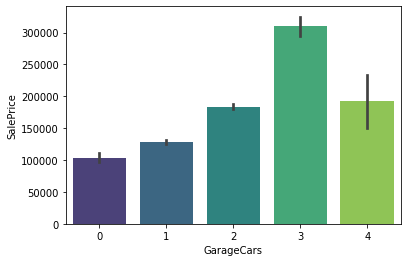

In [ ]:
sns.barplot(x='GarageCars' , y='SalePrice' ,data=hp, palette='viridis')

In [ ]:
plt.figure(figsize = (200,200))
b=sns.barplot(x='GarageArea' , y='SalePrice' ,data=hp, palette='viridis')
b.set_xlabel("GarageArea",fontsize=30)
b.set_ylabel("SalePrice",fontsize=20)


Text(0, 0.5, 'SalePrice')

Text(0, 0.5, 'SalePrice')

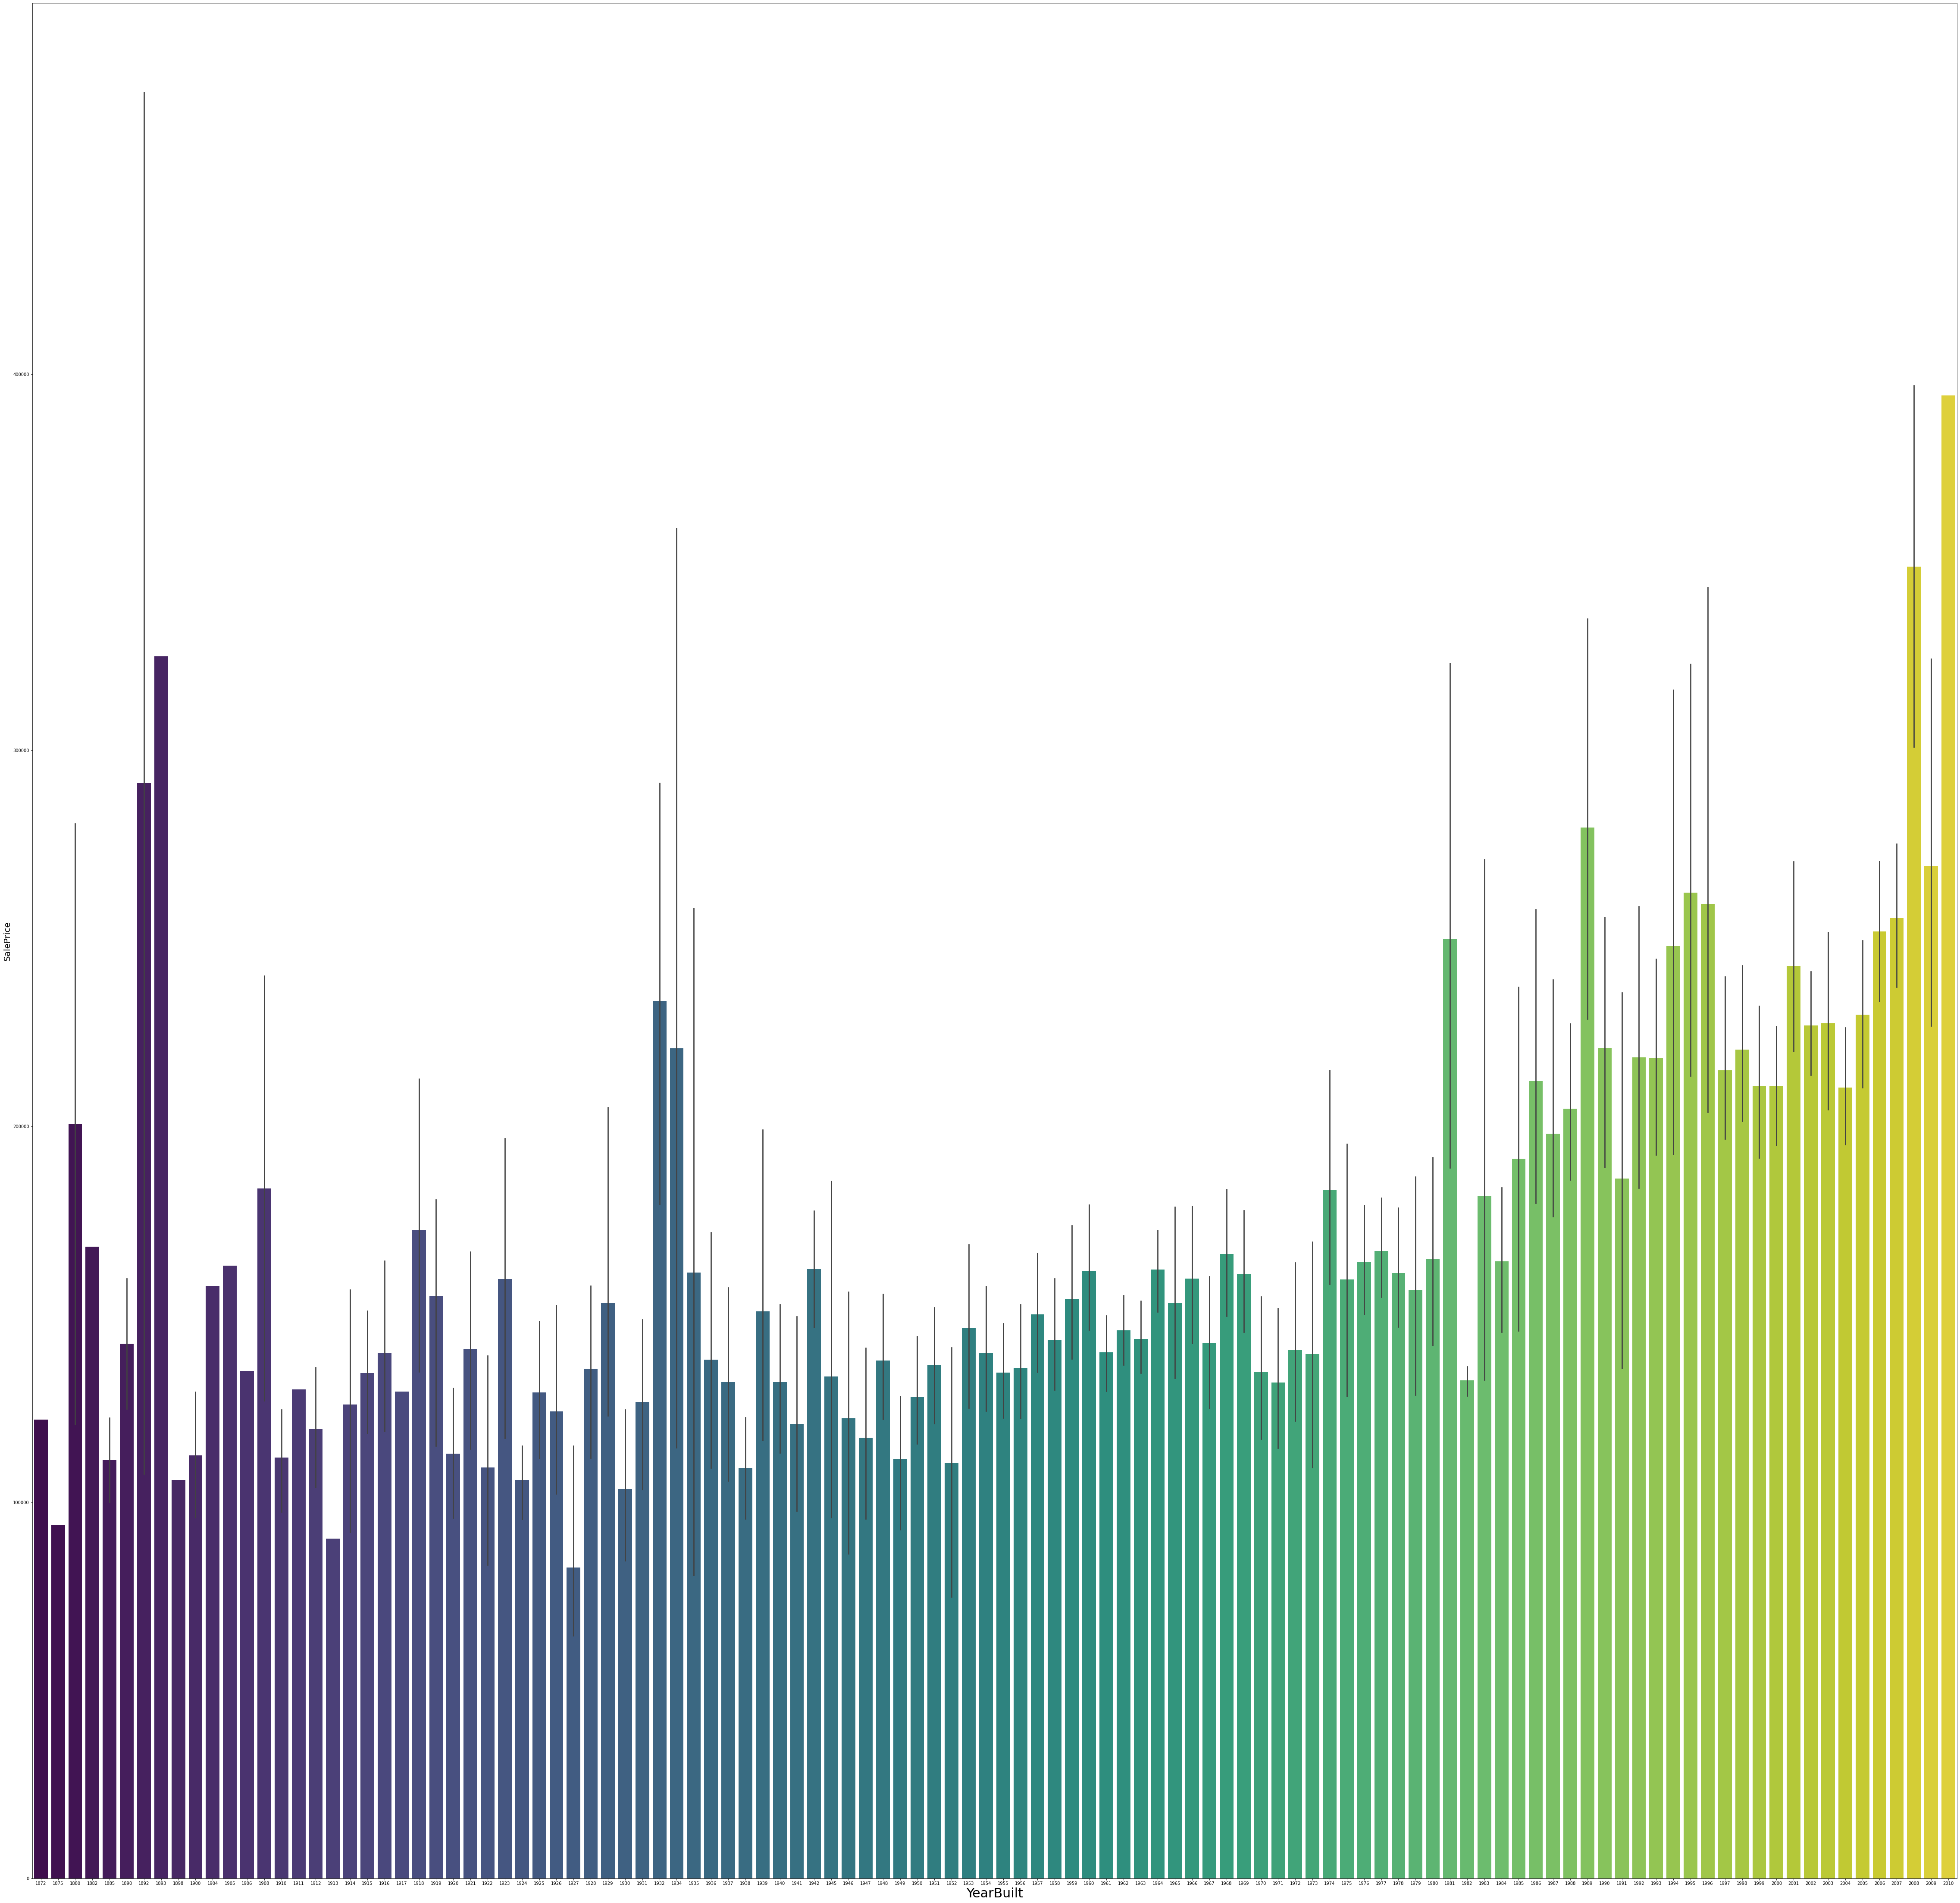

In [ ]:
plt.figure(figsize = (80,80))
b=sns.barplot(x='YearBuilt' , y='SalePrice' ,data=hp, palette='viridis')
b.set_xlabel("YearBuilt",fontsize=30)
b.set_ylabel("SalePrice",fontsize=20)


### **Data Preprocessing**

In [ ]:
hp['GarageYrBlt'].astype(int)

In [55]:
cat_columns=[cat for cat in hp.columns if hp[cat].isna().any()==True]
for i in cat_columns:
    if hp[i].to_string().isdigit()==True:
      print(i , ':' , hp[i].isna().sum())
      imputer = KNNImputer()
      hp[i]= imputer.fit_transform(hp[[i]])
      print(i , ':' , hp[i].isna().sum())
    else:
      print(i , ':' , hp[i].isna().sum())
      imputer = SimpleImputer(strategy='most_frequent')
      hp[i]= imputer.fit_transform(hp[[i]])
      print(i , ':' , hp[i].isna().sum())

LotFrontage : 259
LotFrontage : 0
Alley : 1369
Alley : 0
MasVnrType : 8
MasVnrType : 0
MasVnrArea : 8
MasVnrArea : 0
BsmtQual : 37
BsmtQual : 0
BsmtCond : 37
BsmtCond : 0
BsmtExposure : 38
BsmtExposure : 0
BsmtFinType1 : 37
BsmtFinType1 : 0
BsmtFinType2 : 38
BsmtFinType2 : 0
Electrical : 1
Electrical : 0
FireplaceQu : 690
FireplaceQu : 0
GarageType : 81
GarageType : 0
GarageYrBlt : 81
GarageYrBlt : 0
GarageFinish : 81
GarageFinish : 0
GarageQual : 81
GarageQual : 0
GarageCond : 81
GarageCond : 0
PoolQC : 1453
PoolQC : 0
Fence : 1179
Fence : 0
MiscFeature : 1406
MiscFeature : 0


In [56]:
cat_columns=[cat for cat in hp_test.columns if hp_test[cat].isna().any()==True]
for i in cat_columns:
    if hp_test[i].to_string().isdigit()==True:
      print(i , ':' , hp_test[i].isna().sum())
      imputer = KNNImputer()
      hp_test[i]= imputer.fit_transform(hp_test[[i]])
      print(i , ':' , hp_test[i].isna().sum())
    else:
      print(i , ':' , hp_test[i].isna().sum())
      imputer = SimpleImputer(strategy='most_frequent')
      hp_test[i]= imputer.fit_transform(hp_test[[i]])
      print(i , ':' , hp_test[i].isna().sum())

MSZoning : 4
MSZoning : 0
LotFrontage : 227
LotFrontage : 0
Alley : 1352
Alley : 0
Utilities : 2
Utilities : 0
Exterior1st : 1
Exterior1st : 0
Exterior2nd : 1
Exterior2nd : 0
MasVnrType : 16
MasVnrType : 0
MasVnrArea : 15
MasVnrArea : 0
BsmtQual : 44
BsmtQual : 0
BsmtCond : 45
BsmtCond : 0
BsmtExposure : 44
BsmtExposure : 0
BsmtFinType1 : 42
BsmtFinType1 : 0
BsmtFinSF1 : 1
BsmtFinSF1 : 0
BsmtFinType2 : 42
BsmtFinType2 : 0
BsmtFinSF2 : 1
BsmtFinSF2 : 0
BsmtUnfSF : 1
BsmtUnfSF : 0
TotalBsmtSF : 1
TotalBsmtSF : 0
BsmtFullBath : 2
BsmtFullBath : 0
BsmtHalfBath : 2
BsmtHalfBath : 0
KitchenQual : 1
KitchenQual : 0
Functional : 2
Functional : 0
FireplaceQu : 730
FireplaceQu : 0
GarageType : 76
GarageType : 0
GarageYrBlt : 78
GarageYrBlt : 0
GarageFinish : 78
GarageFinish : 0
GarageCars : 1
GarageCars : 0
GarageArea : 1
GarageArea : 0
GarageQual : 78
GarageQual : 0
GarageCond : 78
GarageCond : 0
PoolQC : 1456
PoolQC : 0
Fence : 1169
Fence : 0
MiscFeature : 1408
MiscFeature : 0
SaleType : 1
Sal

In [57]:
hp.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [58]:
encoder = LabelEncoder()
cat_columns=[cat for cat in hp.columns if hp[cat].dtype=='object']
for i in cat_columns:
  if i in hp.columns:
     hp[i]=encoder.fit_transform(hp[[i]].astype(str))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
encoder = LabelEncoder()
cat_columns=[cat for cat in hp_test.columns if hp_test[cat].dtype=='object']
for i in cat_columns:
  if i in hp_test.columns:
     hp_test[i]=encoder.fit_transform(hp_test[[i]].astype(str))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
hp.Alley.value_counts()

0    1419
1      41
Name: Alley, dtype: int64

In [61]:
h=hp[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].copy()
l=hp[['SalePrice']].copy()

In [62]:
h.head(5)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [63]:
l.head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [64]:
h_test=hp_test[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].copy()

In [65]:
hp.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','Id'], axis=1,inplace=True)

In [66]:
hp_test.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','Id'], axis=1,inplace=True)

In [67]:
scaler=MinMaxScaler()
cat_columns=[cat for cat in hp.columns if hp[cat].values.any()>=1]
for i in cat_columns:
  if i in hp.columns:
    hp[i]=scaler.fit_transform(hp[[i]])

In [68]:
scaler=MinMaxScaler()
cat_columns=[cat for cat in hp_test.columns if hp_test[cat].values.any()>=1]
for i in cat_columns:
  if i in hp_test.columns:
    hp_test[i]=scaler.fit_transform(hp_test[[i]])

In [69]:
hp.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.150685,0.033420,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.2,0.142857,0.857143,0.866667,0.333333,0.12250,0.666667,1.0,0.4,0.666667,1.000000,1.000000,0.4,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.5,0.2,0.5,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,0.090909,1.0,0.8,0.241078
1,0.000000,0.75,0.202055,0.038795,1.0,0.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.2,0.142857,0.571429,0.533333,0.666667,0.00000,1.000000,1.0,0.2,0.666667,1.000000,0.333333,0.0,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.2,0.5,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,0.363636,1.0,0.8,0.203583
2,0.235294,0.75,0.160959,0.046507,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.2,0.142857,0.857143,0.866667,0.333333,0.10125,0.666667,1.0,0.4,0.666667,1.000000,0.666667,0.4,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.2,0.5,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,0.727273,1.0,0.8,0.261908
3,0.294118,0.75,0.133562,0.038561,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.2,0.142857,0.928571,1.000000,0.666667,0.00000,1.000000,1.0,0.0,1.000000,0.333333,1.000000,0.0,0.038271,1.0,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.5,1.0,1.0,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,0.090909,1.0,0.0,0.145952
4,0.235294,0.75,0.215753,0.060576,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.2,0.142857,0.857143,0.866667,0.333333,0.21875,0.666667,1.0,0.4,0.666667,1.000000,0.000000,0.4,0.116052,1.0,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.2,0.5,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,1.000000,1.0,0.8,0.298709


In [70]:
hp=pd.concat([hp,h],axis=1)

In [71]:
hp_test=pd.concat([hp_test,h_test],axis=1)

In [72]:
hp.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,0.235294,0.75,0.150685,0.033420,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.2,0.142857,0.857143,0.866667,0.333333,0.12250,0.666667,1.0,0.4,0.666667,1.000000,1.000000,0.4,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.5,0.2,0.5,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,0.090909,1.0,0.8,0.241078,2003,2003,2003.0,2008
1,0.000000,0.75,0.202055,0.038795,1.0,0.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.2,0.142857,0.571429,0.533333,0.666667,0.00000,1.000000,1.0,0.2,0.666667,1.000000,0.333333,0.0,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.2,0.5,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,0.363636,1.0,0.8,0.203583,1976,1976,1976.0,2007
2,0.235294,0.75,0.160959,0.046507,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.2,0.142857,0.857143,0.866667,0.333333,0.10125,0.666667,1.0,0.4,0.666667,1.000000,0.666667,0.4,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.2,0.5,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,0.727273,1.0,0.8,0.261908,2001,2002,2001.0,2008
3,0.294118,0.75,0.133562,0.038561,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.2,0.142857,0.928571,1.000000,0.666667,0.00000,1.000000,1.0,0.0,1.000000,0.333333,1.000000,0.0,0.038271,1.0,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.5,1.0,1.0,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,0.090909,1.0,0.0,0.145952,1915,1970,1998.0,2006
4,0.235294,0.75,0.215753,0.060576,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.2,0.142857,0.857143,0.866667,0.333333,0.21875,0.666667,1.0,0.4,0.666667,1.000000,0.000000,0.4,0.116052,1.0,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.2,0.5,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.0,1.000000,1.0,0.8,0.298709,2000,2000,2000.0,2008


In [26]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   float64
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   float64
 12  Condition1     1460 non-null   float64
 13  Condition2     1460 non-null   float64
 14  BldgType       1460 non-null   float64
 15  HouseStyle     1460 non-null   float64
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  RoofStyl

## **Plotting And Understanding Data Part 2**

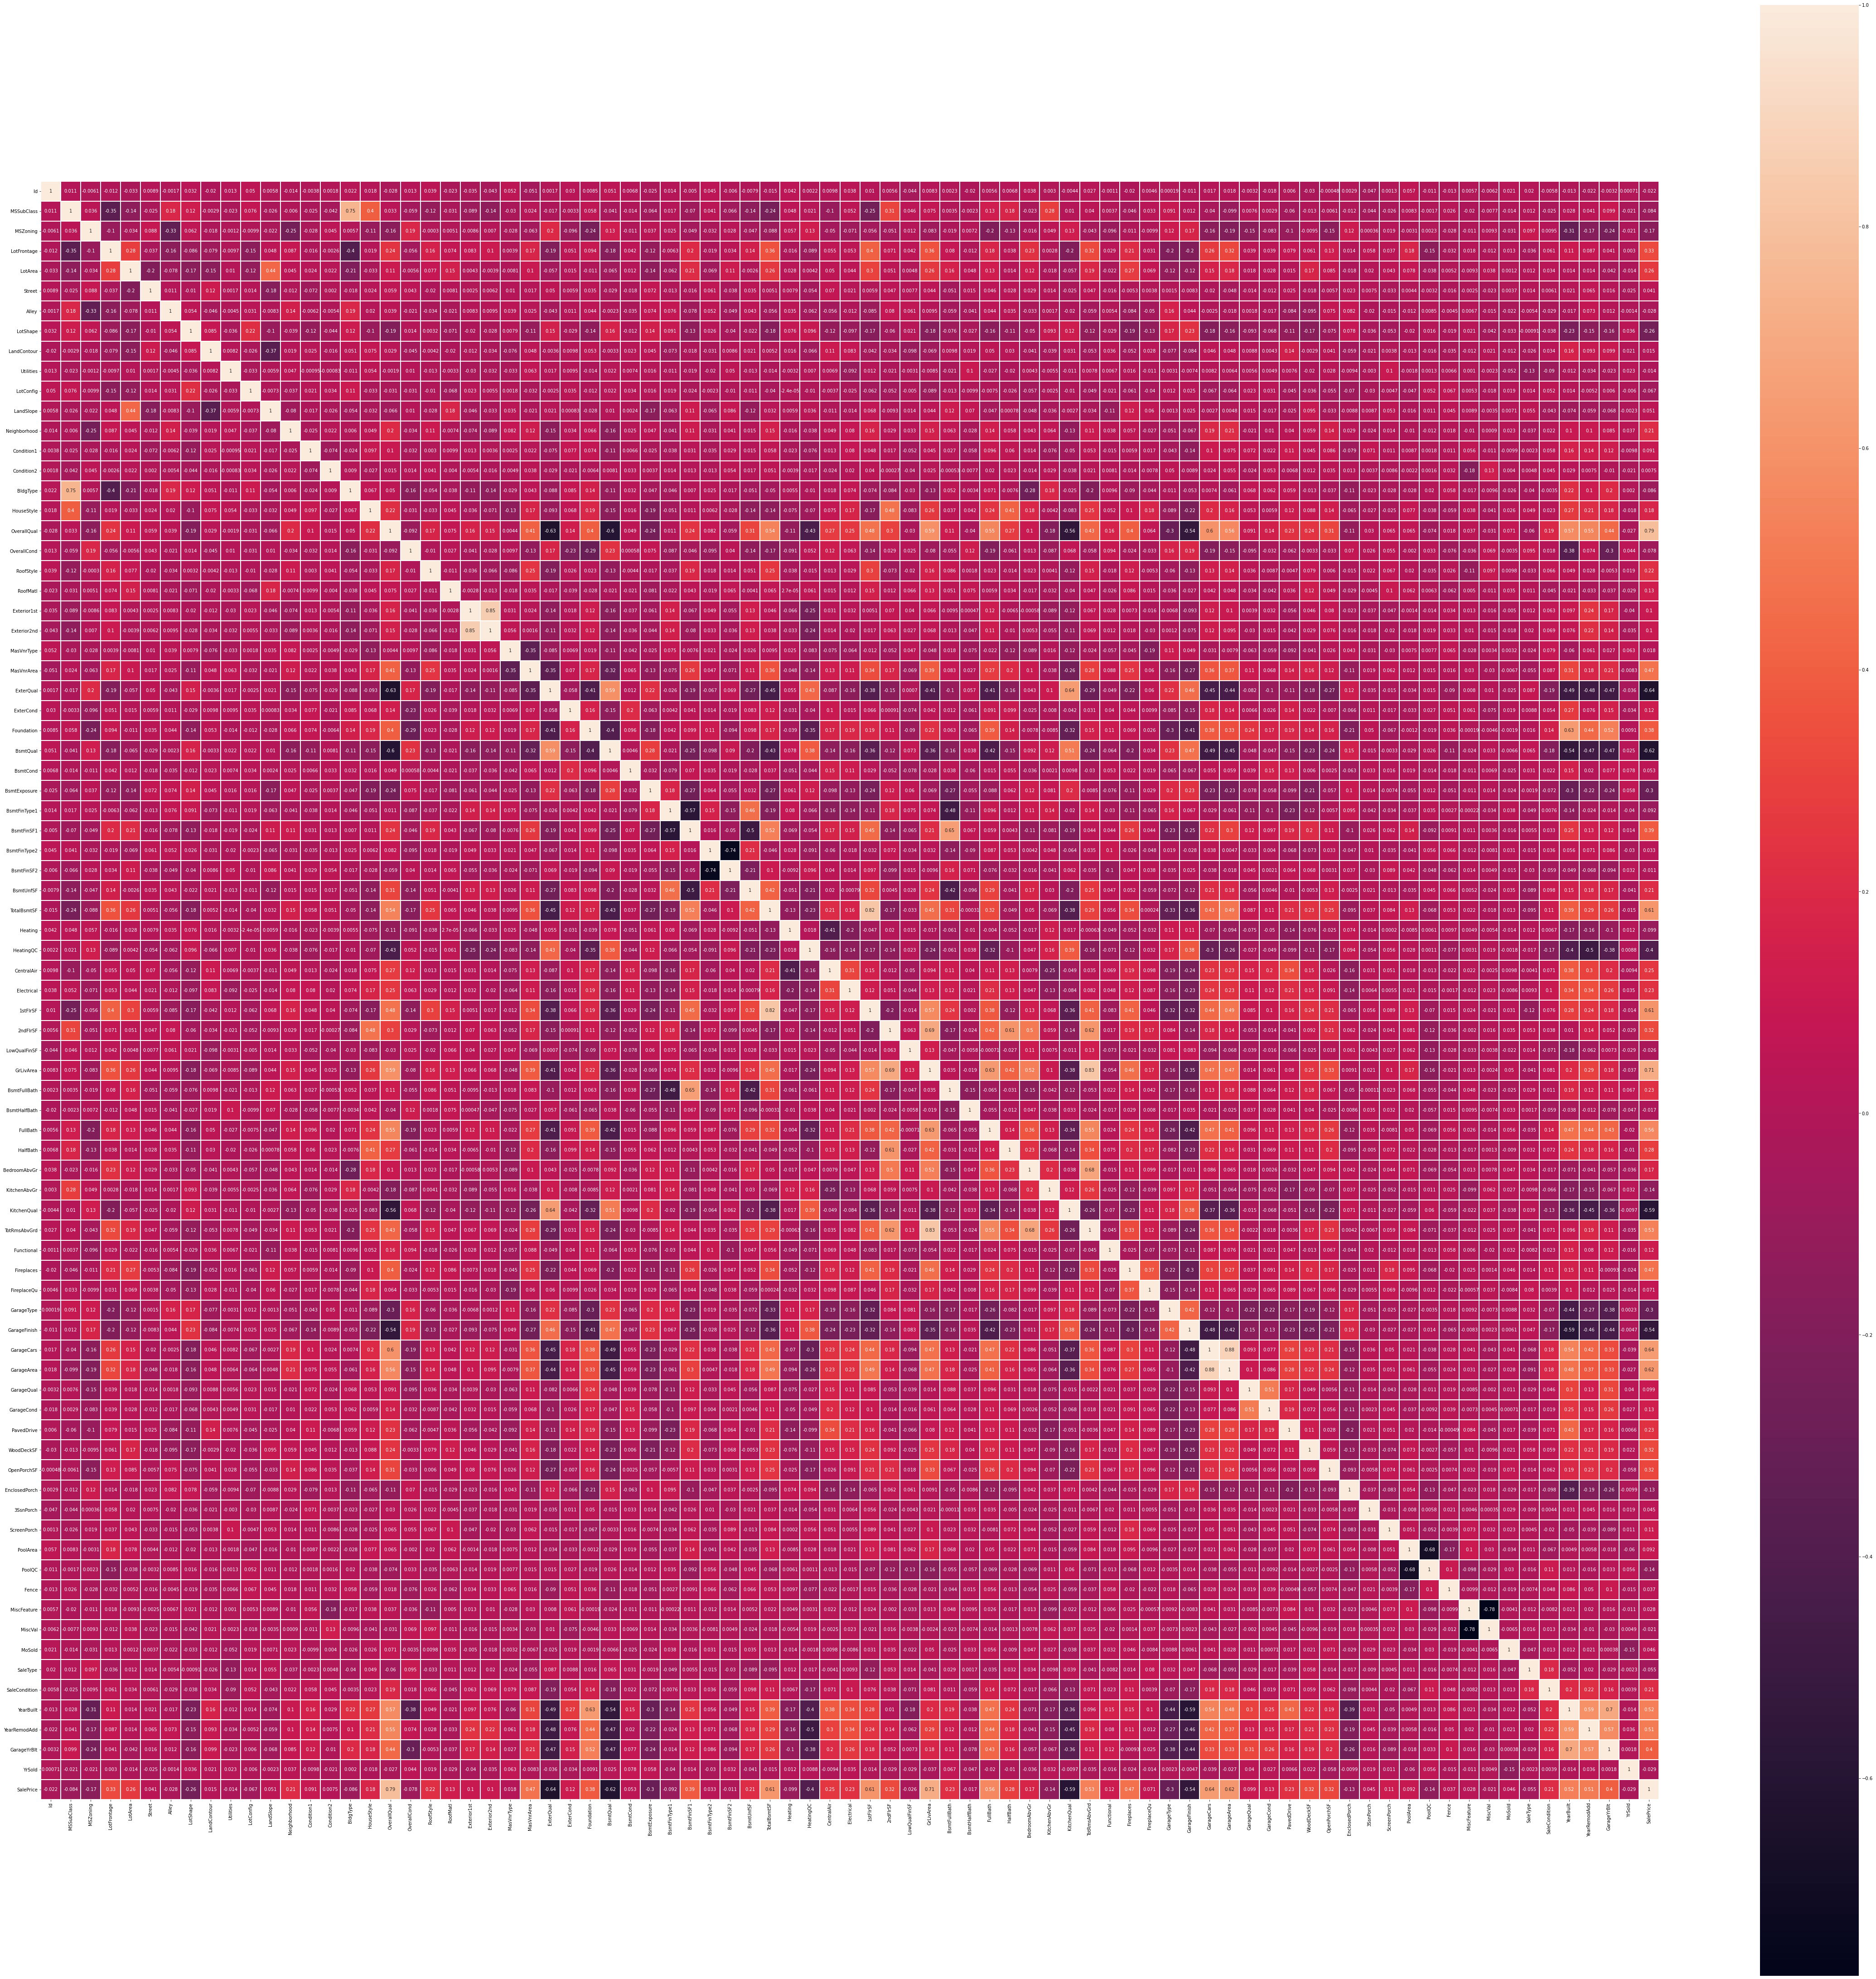

In [ ]:
plt.figure(figsize = (80,80))
sns.heatmap(hp.corr(), annot=True,square=True,linewidths=1)

### **Splitting Data**

In [73]:
X=hp.drop('SalePrice',axis=1)
y=hp['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Implementing Different Machine Learning Regression Algorithms

## **Linear Regression**

**Fitting Data**

In [78]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prediction**

In [75]:
y_pred=lr.predict(X_test)
print('Mean Squared Errror  : ', mean_squared_error(y_test, y_pred))
print('R2 Score  : ', r2_score(y_test, y_pred)*100)

Mean Squared Errror  :  0.0013248347651598476
R2 Score  :  86.62740242669632


### **Ridge**

**Fitting Data**

In [76]:
'''poly=PolynomialFeatures(degree=5)
ridge = Ridge(alpha = 1)
ridge.fit(poly.fit_transform(X_train), y_train)
y_pred=ridge.predict(poly.fit_transform(X_test))
'''
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

**Prediction**

In [77]:
y_pred=ridge.predict(X_test)
print('Mean Squared Errror  : ', mean_squared_error(y_test, y_pred))
print('R2 Score  : ', r2_score(y_test, y_pred)*100)

Mean Squared Errror  :  0.0013206779753224724
R2 Score  :  86.6693601705251


## Lasso

**Fitting Data**

In [86]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

**Prediction**

In [87]:
y_pred=lasso.predict(X_test)
print('Mean Squared Errror  : ', mean_squared_error(y_test, y_pred))
print('R2 Score  : ', r2_score(y_test, y_pred)*100)

Mean Squared Errror  :  0.008040939574134293
R2 Score  :  18.83648296081969


## **Choosing Ridge**

In [88]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [91]:
y_pred=ridge.predict(hp_test)*1000000

In [92]:
hp_sample['SalePrice']=y_pred
hp_sample.head(5)

,Id,SalePrice
0,1461,226210.737542
1,1462,275927.602285
2,1463,310200.986364
3,1464,330146.400303
4,1465,333783.028144


In [93]:
hp_sample.to_csv("hp_model.csv",index=False)

**Thank YOU**